In [283]:
import sys
sys.path.append("..")

In [284]:
from datasets import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SAT_df=get_SATScores()
SAT_df=pd.read_csv('https://data.cityofnewyork.us/resource/rt5r-ie69.csv')
SAT_df.head()

,critical_reading_mean,dbn,mathematics_mean,number_of_test_takers,school_name,writing_mean
0,391.0,01M292,425.0,31.0,Henry Street School for International Studies,385.0
1,394.0,01M448,419.0,60.0,University Neighborhood High School,387.0
2,418.0,01M450,431.0,69.0,East Side Community High School,402.0
3,385.0,01M458,370.0,26.0,SATELLITE ACADEMY FORSYTH ST,378.0
4,NaN,01M509,NaN,NaN,CMSP HIGH SCHOOL,NaN


In [285]:
def get_SAT_by_District():
    SAT_df=pd.read_csv('https://data.cityofnewyork.us/resource/rt5r-ie69.csv')
    SAT_df = SAT_df.dropna()
    SAT_df.critical_reading_mean = SAT_df.critical_reading_mean.astype('int')
    SAT_df.mathematics_mean= SAT_df.mathematics_mean.astype('int')
    SAT_df.writing_mean = SAT_df.writing_mean.astype('int')
    SAT_df.number_of_test_takers=SAT_df.number_of_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['critical_reading_mean']+SAT_df['mathematics_mean']+SAT_df['writing_mean']


    SAT_df = SAT_df[['dbn','school_name','combined_score','number_of_test_takers']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score','number_of_test_takers']]

    SAT_DF=pd.DataFrame()
    
    SAT_DF['Total_Takers']=SAT_df.groupby('district')['number_of_test_takers'].sum()
    
    SAT_DF['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF['District']=SAT_DF.index
    SAT_DF.District=SAT_DF.District.astype('int')

    SAT_DF.reset_index(drop=True, inplace=True)
    
    SAT_DF = SAT_DF[['District','Total_Takers','Combined_SAT_scores']]
    
    return SAT_DF





In [286]:
SAT_df=get_SAT_by_District()

In [287]:
SAT_df.head()

,District,Total_Takers,Combined_SAT_scores
0,1,560,1343.125000
1,2,5479,1282.035088
2,3,1393,1281.545455
3,4,589,1192.250000
4,5,560,1282.250000


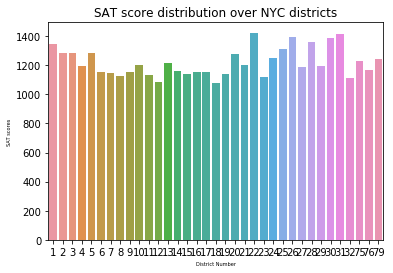

In [288]:

sns.barplot(x=SAT_df.District, y=SAT_df.Combined_SAT_scores)

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score distribution over NYC districts')
plt.show()

In [289]:
print(SAT_df.loc[SAT_df['Combined_SAT_scores'].idxmax()])

District                 22.0
Total_Takers           1906.0
Combined_SAT_scores    1424.0
Name: 21, dtype: float64


In [290]:
get_SchoolsByDistrict(22)

['MIDWOOD HIGH SCHOOL',
 'JAMES MADISON HIGH SCHOOL',
 'SHEEPSHEAD BAY HIGH SCHOOL',
 'LEON M. GOLDSTEIN HIGH SCHOOL FOR THE SCIENCES',
 'BROOKLYN COLLEGE ACADEMY']

In [291]:
print(SAT_df.loc[SAT_df['Combined_SAT_scores'].idxmin()])

District                 18.0
Total_Takers            243.0
Combined_SAT_scores    1075.2
Name: 17, dtype: float64


In [292]:
get_SchoolsByDistrict(18)

['IT TAKES A VILLAGE ACADEMY',
 'BROOKLYN GENERATION SCHOOL',
 'BROOKLYN THEATRE ARTS HIGH SCHOOL',
 'KURT HAHN EXPEDITIONARY LEARNING SCHOOL',
 'VICTORY COLLEGIATE HIGH SCHOOL',
 'BROOKLYN BRIDGE ACADEMY',
 'ARTS & MEDIA PREPARATORY ACADEMY',
 'HIGH SCHOOL FOR INNOVATION IN ADVERTISING AND MEDIA',
 'CULTURAL ACADEMY FOR THE ARTS AND SCIENCES',
 'HIGH SCHOOL FOR MEDICAL PROFESSIONS',
 'OLYMPUS ACADEMY',
 'ACADEMY FOR CONSERVATION AND THE ENVIRONMENT',
 'URBAN ACTION ACADEMY',
 'EAST BROOKLYN COMMUNITY HIGH SCHOOL']